## Lab 7: Bootstrapping

### Initialising

In [1]:
import numpy as np

grid = np.zeros((4, 4))
start_state = (0, 0)
goal_state = (3, 3)
gamma = 0.9  
alpha = 0.1  
reward = -0.1  
goal_reward = 1.0

actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

### Next State 

In [2]:
def next(state, action):
    row, col = state
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid.shape[0] or new_col < 0 or new_col >= grid.shape[1]:
        return state  
    return (new_row, new_col)

### Terminal Check,

In [3]:
def is_terminal(state):
    return state == goal_state

### Update state values using bootstrapping

In [4]:
V = np.zeros_like(grid)

def run_episode():
    state = start_state
    trajectory = [state]  
    while not is_terminal(state):
        action = np.random.choice(actions)
        next_state = next(state, action)
        r = goal_reward if next_state == goal_state else reward
        V[state] += alpha * (r + gamma * V[next_state] - V[state])
        state = next_state
        trajectory.append(state)
    return trajectory

### Run Mutliple Episodes

In [5]:
num_episodes = 100
trajectories = []
for episode in range(num_episodes):
    trajectory = run_episode()
    trajectories.append(trajectory)
    if episode % 10 == 0:
        print(f"Episode {episode} completed.")

Episode 0 completed.
Episode 10 completed.
Episode 20 completed.
Episode 30 completed.
Episode 40 completed.
Episode 50 completed.
Episode 60 completed.
Episode 70 completed.
Episode 80 completed.
Episode 90 completed.


### State Value Function Visualisation

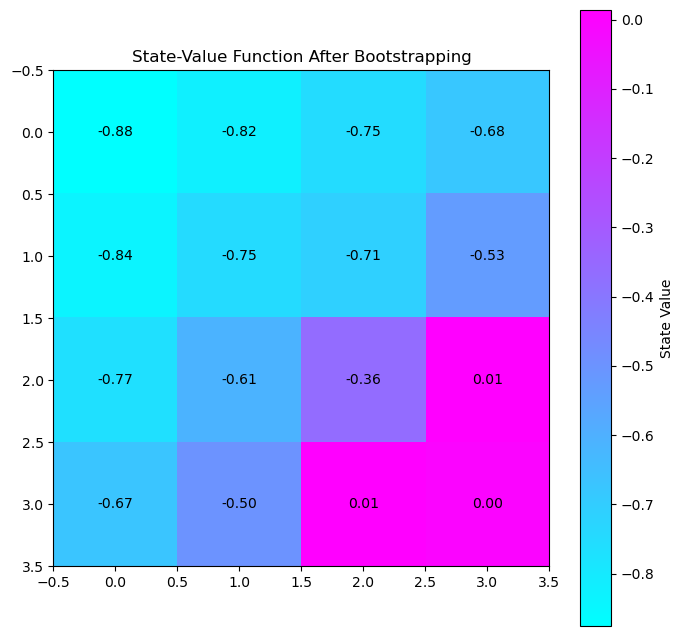

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(V, cmap='cool', interpolation='none', origin='upper')
for i in range(4):
    for j in range(4):
        plt.text(j, i, f"{V[i, j]:.2f}", ha='center', va='center', color='black')
plt.title("State-Value Function After Bootstrapping")
plt.colorbar(label="State Value")
plt.show()

### Sample trajectory

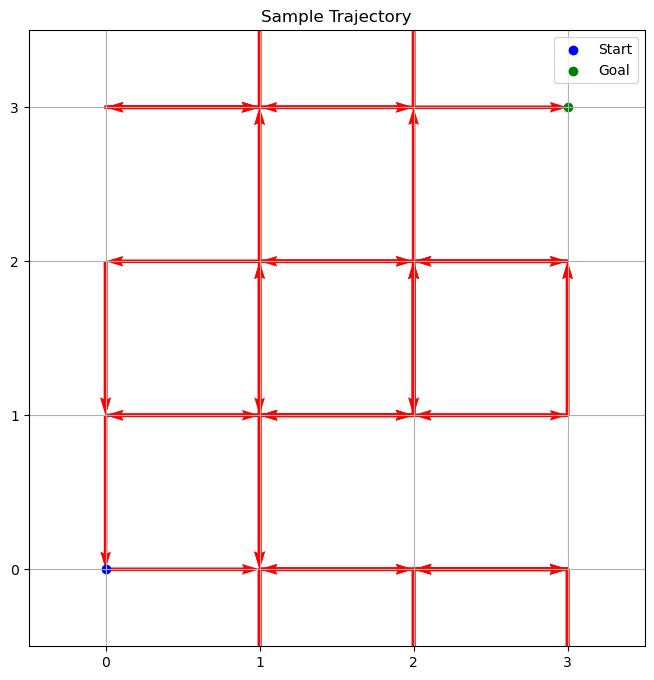

In [7]:
trajectory = trajectories[-1]
x, y = [], []
u, v = [], []

for i in range(len(trajectory) - 1):
    current = trajectory[i]
    next_ = trajectory[i + 1]
    x.append(current[1])
    y.append(current[0])
    u.append(next_[1] - current[1])
    v.append(current[0] - next_[0]) 

plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='Greys', interpolation='none', origin='upper')
plt.title("Sample Trajectory")
plt.xticks(range(4))
plt.yticks(range(4))
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, color='red')
plt.scatter([start_state[1]], [start_state[0]], color='blue', label='Start')
plt.scatter([goal_state[1]], [goal_state[0]], color='green', label='Goal')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## END